In [1]:
# import everything
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential, optimizers
from keras.layers import Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard, EarlyStopping


np.random.seed(1)
tf.random.set_seed(1)

In [2]:
# load the data from numpy objects
X_train = np.load('../my_dataset/X_train.npy')
X_test = np.load('../my_dataset/X_test.npy')
X_validate = np.load('../my_dataset/X_validate.npy')

y_train = np.load('../my_dataset/y_train.npy')
y_test = np.load('../my_dataset/y_test.npy')
y_validate = np.load('../my_dataset/y_validate.npy')

In [3]:
repeats = 200
early_stops = 20
epochs = 400
OriginalModel = "Conv4Nodes48Dim3Batch8Dropout0.2No2"
batch = 8

import random



for repeat in range(repeats):
    model = tf.keras.models.load_model(OriginalModel)
    name = OriginalModel+"Try"+str(repeat)
    tensorboard = TensorBoard(log_dir="logs/{}".format(name))

    model.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'],
                )

    # reset the model a bit
    callbacks = [EarlyStopping(monitor='val_accuracy', patience=early_stops, restore_best_weights=False), tensorboard]

    for layer in model.layers:
        if hasattr(layer, 'rate'):
            layer.rate = 0.50

    model.fit(X_train, y_train,
        epochs=2,
        validation_data=(X_validate, y_validate),
        callbacks=callbacks,
        batch_size=batch)
    
    model.save("models/"+name, save_format="h5")



    # train again
    model = tf.keras.models.load_model("models/"+name)
    callbacks = [EarlyStopping(monitor='val_accuracy', patience=early_stops, restore_best_weights=True), tensorboard]
    for layer in model.layers:
        if hasattr(layer, 'rate'):
            layer.rate = 0.2

    model.fit(X_train, y_train,
        epochs=epochs,
        validation_data=(X_validate, y_validate),
        callbacks=callbacks,
        batch_size=batch)
    
    model.save("models/"+name, save_format="h5")

Epoch 1/2
255/255 [==============================] - 6s 16ms/step - loss: 1.5500 - accuracy: 0.7097 - val_loss: 2.5358 - val_accuracy: 0.6201
Epoch 2/2
55/55 [==============================] - 1s 19ms/step - loss: 3.5162 - accuracy: 0.3158 - val_loss: 2.6061 - val_accuracy: 0.4256
Epoch 1/2
55/55 [==============================] - 1s 18ms/step - loss: 2.8756 - accuracy: 0.3181 - val_loss: 2.5114 - val_accuracy: 0.5011
Epoch 2/2
55/55 [==============================] - 1s 17ms/step - loss: 2.8355 - accuracy: 0.3684 - val_loss: 2.2626 - val_accuracy: 0.5538
Epoch 1/400
255/255 [==============================] - 4s 14ms/step - loss: 0.2671 - accuracy: 0.9637 - val_loss: 1.5850 - val_accuracy: 0.6888
Epoch 2/400
255/255 [==============================] - 3s 13ms/step - loss: 0.0694 - accuracy: 0.9897 - val_loss: 1.7448 - val_accuracy: 0.6819
Epoch 3/400
255/255 [==============================] - 3s 13ms/step - loss: 0.0544 - accuracy: 0.9867 - val_loss: 1.8861 - val_accuracy: 0.6842
Epoch 

In [12]:
import os
topFiveScores = [0, 0, 0, 0, 0]
topFiveNames = ['', '', '', '', '']
OriginalModel = "Conv4Nodes48Dim3Batch8Dropout0.2No2"

for repeat in range(repeats):
    model = tf.keras.models.load_model(OriginalModel)
    name = OriginalModel+"Try"+str(repeat)

    if not os.path.exists("models/"+name):
        continue

    model = tf.keras.models.load_model("models/"+name)
    valuation = model.evaluate(X_validate, y_validate)[1]

    for i in range(5):
        if valuation > topFiveScores[i]:
            topFiveScores[i] = valuation
            topFiveNames[i] = name
            break

for i in range(5):
    print(topFiveNames[i] + ": " + str(topFiveScores[i]))

14/14 [==============================] - 0s 9ms/step - loss: 1.5892 - accuracy: 0.6911
Conv4Nodes48Dim3Batch8Dropout0.2No2Try166: 0.7299771308898926
Conv4Nodes48Dim3Batch8Dropout0.2No2Try179: 0.711670458316803
Conv4Nodes48Dim3Batch8Dropout0.2No2Try53: 0.709382176399231
Conv4Nodes48Dim3Batch8Dropout0.2No2Try92: 0.709382176399231
Conv4Nodes48Dim3Batch8Dropout0.2No2Try101: 0.709382176399231


In [13]:
for i in range(5):
    print(topFiveNames[i] + ": " + str(topFiveScores[i]))

Conv4Nodes48Dim3Batch8Dropout0.2No2Try166: 0.7299771308898926
Conv4Nodes48Dim3Batch8Dropout0.2No2Try179: 0.711670458316803
Conv4Nodes48Dim3Batch8Dropout0.2No2Try53: 0.709382176399231
Conv4Nodes48Dim3Batch8Dropout0.2No2Try92: 0.709382176399231
Conv4Nodes48Dim3Batch8Dropout0.2No2Try101: 0.709382176399231


14/14 [==============================] - 0s 9ms/step
Model accuracy (Validation): 73.0 %
Model accuracy (Test): 67.73 %
Image label: Κυψέλη
Model prediction: Κυψέλη


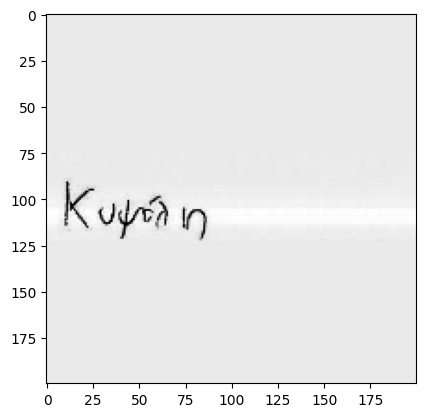

Image label: Βοτανικός
Model prediction: Βοτανικός


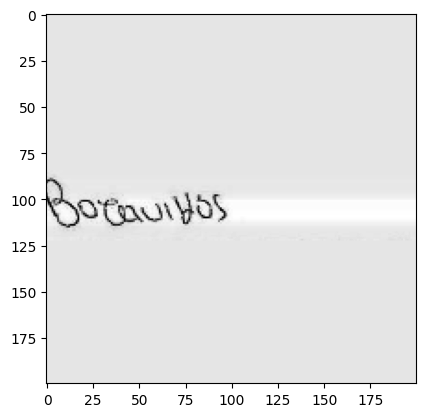

Image label: Πειραιάς
Model prediction: Πειραιάς


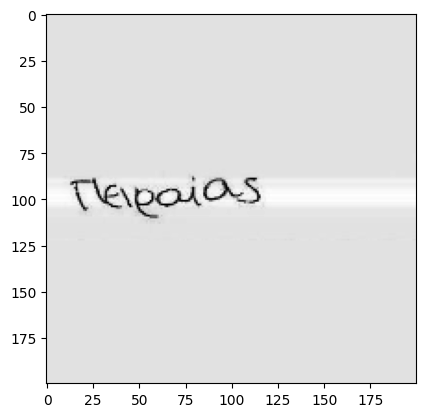

Image label: Αναφιώτικα
Model prediction: Αναφιώτικα


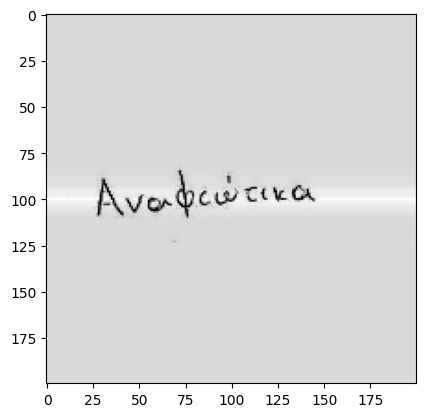

Image label: Αμπελόκηποι
Model prediction: Αμπελόκηποι


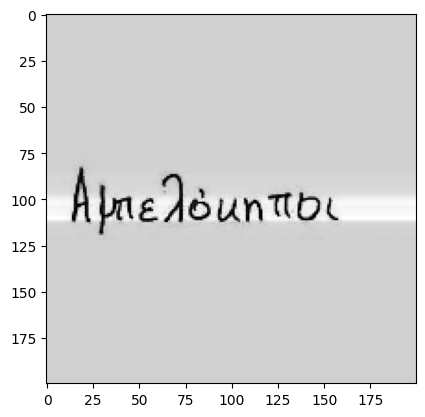

Image label: Υμηττός
Model prediction: Υμηττός


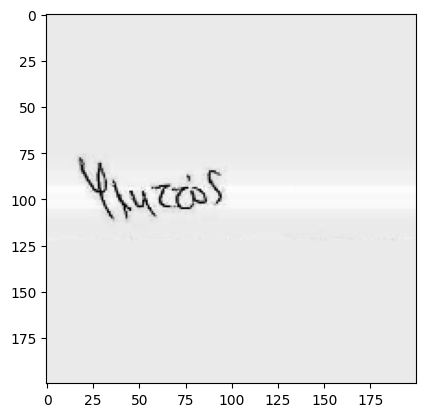

Image label: Εξάρχεια
Model prediction: Εξάρχεια


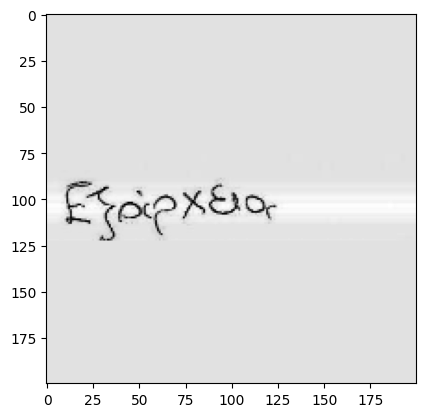

Image label: Ζάππειο
Model prediction: Ζάππειο


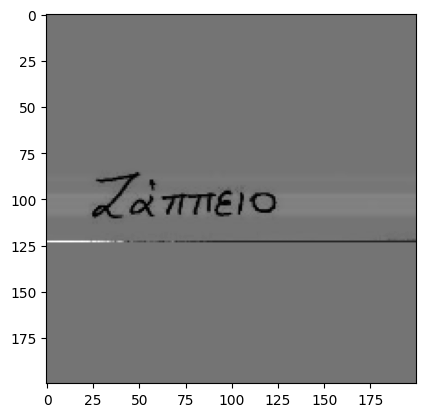

Image label: Μοναστηράκι
Model prediction: Κουκάκι


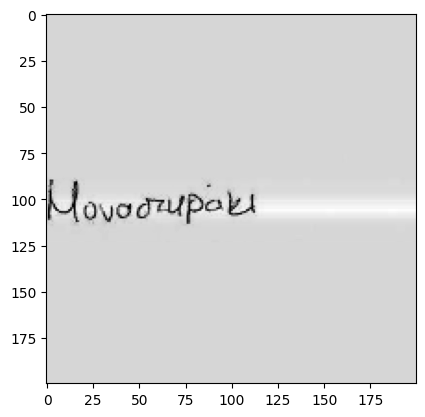

Image label: Παγκράτι
Model prediction: Παγκράτι


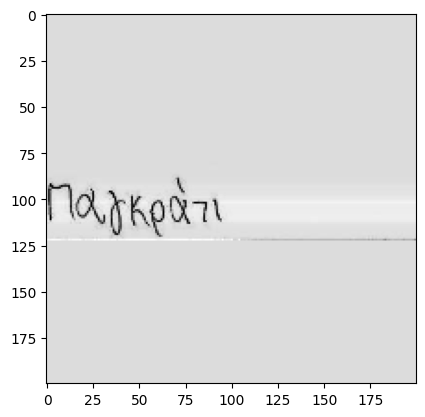

In [5]:
test_labels = np.load('../labels_and_paths/test_labels.npy')
model_dictionary = np.load('../labels_and_paths/model_dictionary.npy')

NAME = "Conv4Nodes48Dim3Batch8Dropout0.2No2Try166"

model = keras.models.load_model("models/"+NAME)
accuracy_val = round(model.evaluate(X_validate, y_validate)[1] * 100, 2)
accuracy_test = round(model.evaluate(X_test, y_test)[1] * 100, 2)
predictions = model.predict(X_test)

print("Model accuracy (Validation): " + str(accuracy_val) + " %")
print("Model accuracy (Test): " + str(accuracy_test) + " %")

for i in range(10):
    print(f"Image label: {test_labels[i]}")
    print(f"Model prediction: {model_dictionary[np.argmax(predictions[i])]}")
    plt.imshow(X_test[i], cmap='gray')  # graph it
    plt.show()